---
# The Perceptron
## Iris Species Binary  Classification

In this notebook we implement the *perceptron learning algorithm* for binary species classification using the [iris dataset](http://)

The perceptron was first implemented by ...

The algorithm is to ...

Our task will be to classifiy setosa and versicolor species using two feature measures, such as sepal length and sepal width.We will need the following libraries: 

* [matplotlib]()
* [pandas]()
* [numpy]()
...


---

In [2]:
# import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# import iris dataset from sklearn
from sklearn import datasets

# load the iris data (specifying type as data frames)
iris = datasets.load_iris(as_frame=True)

In [5]:
iris['data']
iris['target_names']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


---

Describe what the object iris is and tell the reader how to extract useful information for our task.

In the following cell we extract our data to numpy arrays.

---

In [10]:
# Species to desired label dictionary
lable_dict = {iris['target_names'][0]: 1.0, 
             iris['target_names'][1]: -1.0}

# Extract desired features and labels, and convert to nympy arrays
X = iris['data'][['sepal length (cm)', 'sepal width (cm)']].iloc[:100]
y = iris['target'].iloc[:100]
X = X.to_numpy()
y = y.to_numpy()

# change labels to match our desired labels, 1 and -1
for i, label in enumerate(y):
    if label ==0:
        y[i]=1
    elif label==1:
        y[i] = -1


---

Insert an image of the perceptron drawn as a neuron

How the algorithm works

(latex here)
$
\hat{y}^{i} = \text{sign}(w^T\bar{x}^i)
$


Activation function, the sign function, is defined below.

---

In [51]:
def sign(x, y):
    if x@y>0:
        return 1
    else:
        return -1
    
    
def loss(w, feature= X_bar, label = y, alpha = 0.5):
    return sum(alpha*(sign(w, x) - label[i])**2 for i, x in enumerate(feature))
    

---

### The Gradient Approximation Update Rule

explain the rule

$
w \rightarrow w- \alpha(\hat{y}^i - y^i) \bar{x}^i
$



---

In [34]:
# hack away am=nd make our desired X_bar matrix

X_bar = np.append(X, np.ones([len(X), 1]), axis=1)


---
### Visualization of Data

explain the importance of data visualization

discuss waht we can find in the figures below

---

Text(0.5, 1.0, 'Iris Data Plot')

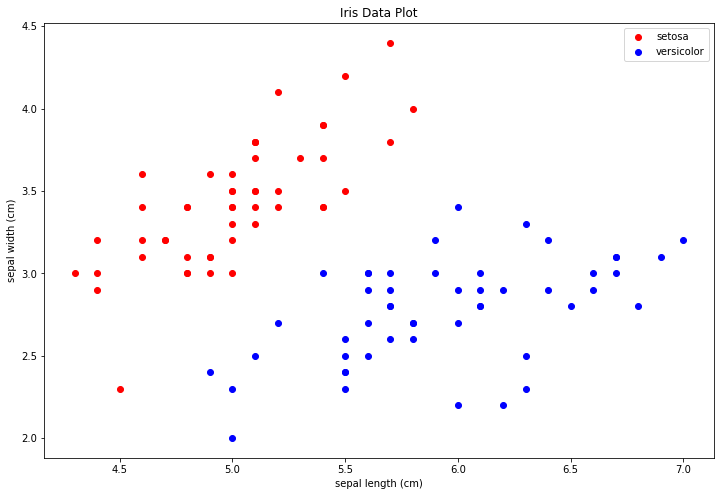

In [42]:
plt.figure(figsize=(12, 8))
plt.scatter(X_bar[:50, 0], X_bar[:50, 1], label = 'setosa', color = 'r')
plt.scatter(X_bar[50:, 0], X_bar[50:, 1], label = 'versicolor', color = 'b')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend()
plt.title('Iris Data Plot')

In [59]:
# define gradient function

def grad_approx(w, x, y):
    return (sign(w, x) - y) * x


# set epochs
epochs = 1000
alpha = 0.5

# random initial weights
w = np.random.rand(3)



In [49]:
print(f'the loss before training = {loss(w)}')

the loss before training = 100.0


In [60]:
losses = []
for _ in range(epochs):
    for _ in range(50):
        random_id = np.random.randint(100)
        w = w - alpha * grad_approx(w, X_bar[random_id], y[random_id])
    losses.append(loss(w))
    

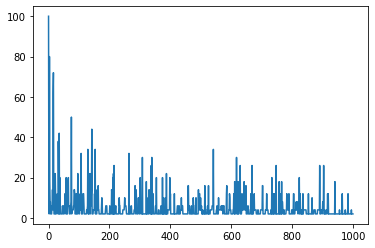

In [62]:
plt.plot(losses)
plt.show()

Text(0.5, 1.0, 'Iris Data Plot')

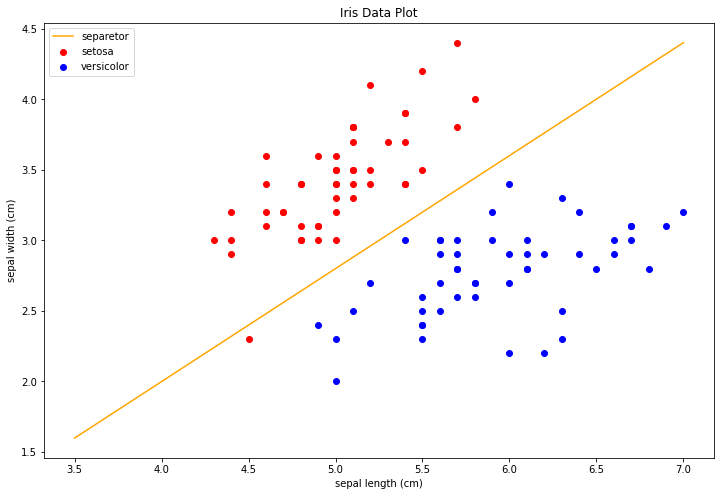

In [66]:
domain = np.arange(3.5, 7.5, 0.5)
line = [-(w[0]*x + w[2])/w[1] for x in domain]



plt.figure(figsize=(12, 8))
plt.scatter(X_bar[:50, 0], X_bar[:50, 1], label = 'setosa', color = 'r')
plt.scatter(X_bar[50:, 0], X_bar[50:, 1], label = 'versicolor', color = 'b')

plt.plot(domain, line, label='separetor', color = 'orange')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend()
plt.title('Iris Data Plot')
